In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import drive

from PIL import Image

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Загрузим данные
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Удалим лишний столбец
df = df.drop('Time', axis=1)

In [ ]:
#Отнормируем столбец
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
#Разделим на нормальные транзакции и мошеннические
normal = df.loc[df.Class == 0]
outliers = df.loc[df.Class == 1]

In [ ]:
#Разделим выборку на обучающую и тестовую
x_train, x_test = train_test_split(normal, test_size=0.2)

In [ ]:
#Уберем лишний столбец
x_train.drop('Class', axis=1, inplace=True)
#Соединим нормальные и мошеннические транзакции в тостовой выборке
x_test = pd.concat((x_test, outliers))
#запишем метки классов
y_test = x_test.Class
x_test.drop('Class', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(x_train.shape)
print(x_test.shape)

(227452, 29)
(57355, 29)


Epoch 1/20
711/711 [==============================] - 5s 5ms/step - loss: 0.8227 - val_loss: 0.3384
Epoch 2/20
711/711 [==============================] - 4s 5ms/step - loss: 0.3677 - val_loss: 0.2439
Epoch 3/20
711/711 [==============================] - 4s 5ms/step - loss: 0.2772 - val_loss: 0.2011
Epoch 4/20
711/711 [==============================] - 4s 5ms/step - loss: 0.2524 - val_loss: 0.1840
Epoch 5/20
711/711 [==============================] - 4s 5ms/step - loss: 0.2301 - val_loss: 0.1648
Epoch 6/20
711/711 [==============================] - 4s 5ms/step - loss: 0.1982 - val_loss: 0.1803
Epoch 7/20
711/711 [==============================] - 4s 5ms/step - loss: 0.1855 - val_loss: 0.1519
Epoch 8/20
711/711 [==============================] - 4s 5ms/step - loss: 0.1918 - val_loss: 0.1468
Epoch 9/20
711/711 [==============================] - 4s 5ms/step - loss: 0.1682 - val_loss: 0.1407
Epoch 10/20
711/711 [==============================] - 4s 5ms/step - loss: 0.1620 - val_loss: 0.1571

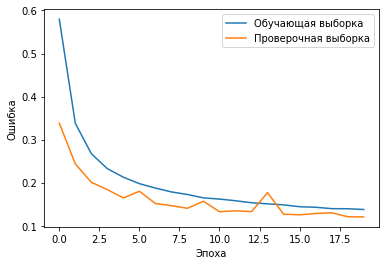

In [ ]:
#обучим модель
input = Input((29,))
x = BatchNormalization()(input)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(25, activation='relu')(x)
x = BatchNormalization()(x)
z = Dense(8, activation='relu')(x)

x = Dense(25, activation='relu')(z)
x = BatchNormalization()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

output = Dense(29, activation='linear')(x)

model = Model(input,output)

model.compile(loss='mse', optimizer=Adam(lr=0.001))
history = model.fit(x_train, x_train, epochs=20, batch_size=256, validation_split=0.2)

plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Epoch 1/10
711/711 [==============================] - 5s 6ms/step - loss: 0.1287 - val_loss: 0.1074
Epoch 2/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1256 - val_loss: 0.1072
Epoch 3/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1256 - val_loss: 0.1067
Epoch 4/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1250 - val_loss: 0.1069
Epoch 5/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1235 - val_loss: 0.1058
Epoch 6/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1307 - val_loss: 0.1055
Epoch 7/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1248 - val_loss: 0.1053
Epoch 8/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1228 - val_loss: 0.1064
Epoch 9/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1238 - val_loss: 0.1058
Epoch 10/10
711/711 [==============================] - 4s 5ms/step - loss: 0.1287 - val_loss: 0.1052

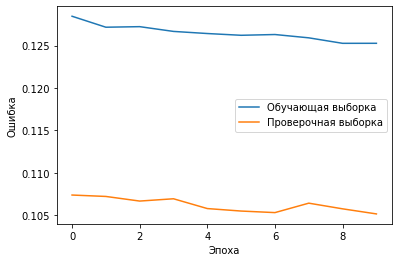

In [ ]:
#Дообучим модель
model.compile(loss='mse', optimizer=Adam(lr=0.0001))
history = model.fit(x_train, x_train, epochs=10, batch_size=256, validation_split=0.2)

plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#вернем восстановленные транзакции
pred = model.predict(x_test)

In [ ]:
#Посчитаем ошубку на тестовой выборке
error = np.mean(np.power(x_test - pred, 2), axis=1)

In [ ]:
error_normal = error[y_test.values == 0] # среднеквадратичная ошибка на нормальных операциях
error_outliers = error[y_test.values == 1] # среднеквадратичная ошибка на мошеннических операциях

In [ ]:
print("Минимальная ошибка нормальных транзакций:", round(min(error_normal),4)) 
print("Максимальная ошибка нормальных транзакций:", round(max(error_normal),4)) 
print("Средняя ошибка нормальных транзакций:", round(sum(error_normal) / len(error_normal),4))

Минимальная ошибка нормальных транзакций: 0.0029
Максимальная ошибка нормальных транзакций: 28.8783
Средняя ошибка нормальных транзакций: 0.1057


In [ ]:
print("Минимальная ошибка мошеннических транзакций:", round(min(error_outliers),4)) 
print("Максимальная ошибка мошеннических транзакций:", round(max(error_outliers),4)) 
print("Средняя ошибка мошеннических транзакций:", round(sum(error_outliers) / len(error_outliers),4)) 

Минимальная ошибка мошеннических транзакций: 0.0082
Максимальная ошибка мошеннических транзакций: 101.7235
Средняя ошибка мошеннических транзакций: 9.4687


In [ ]:
# функция принимает какое то пороговое значение и возвращает процент распознанных нормальных и мошеннических транзакций и среднюю точность распознавания
def get_accuracy(bias): 
  is_normal = error_normal < bias # если ошибка меньше порога - то транзакция нормальная
  is_outliers = error_outliers > bias # если ошибка больше порога - то транзакция мошенническая

  proc_normal = sum(is_normal) / len(is_normal) 
  proc_outliers = sum(is_outliers) / len(is_outliers) 

  norm = round(100*proc_normal)
  out = round(100*proc_outliers)
  mean = round(50*(proc_normal + proc_outliers))
      
  return norm, out, mean
  

In [ ]:
#Переберем несколько пороговых значений и выберем то, которое дает лучшую среднюю точность
best=0
for i in range(35,75):
  i /= 100
  norm, out, mean = get_accuracy(i)
  if best <= mean:
    best = mean
    bias = i
    best_norm = norm
    best_out = out
    best_mean = mean
    

In [ ]:
print("Распознано нормальных транзакций: ", best_norm, "%", sep="")
print("Распознано мошеннических транзакций: ", best_out, "%", sep="")
print("Средняя точность распознавания: ", best_mean, "%", sep="")
print("Пороговое значение: ", bias)

Распознано нормальных транзакций: 97%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 92%
Пороговое значение:  0.41


Построим гистограммы ошибок на нормальных операциях и мошеннических. Попробуем определить оптимальный порог:  
1) при котором все мошеннические транзакции будут пойманы  
2) “оптимальный порог”  
3) при котором ни одна нормальная транзакция не будет распознана, как   мошенническая

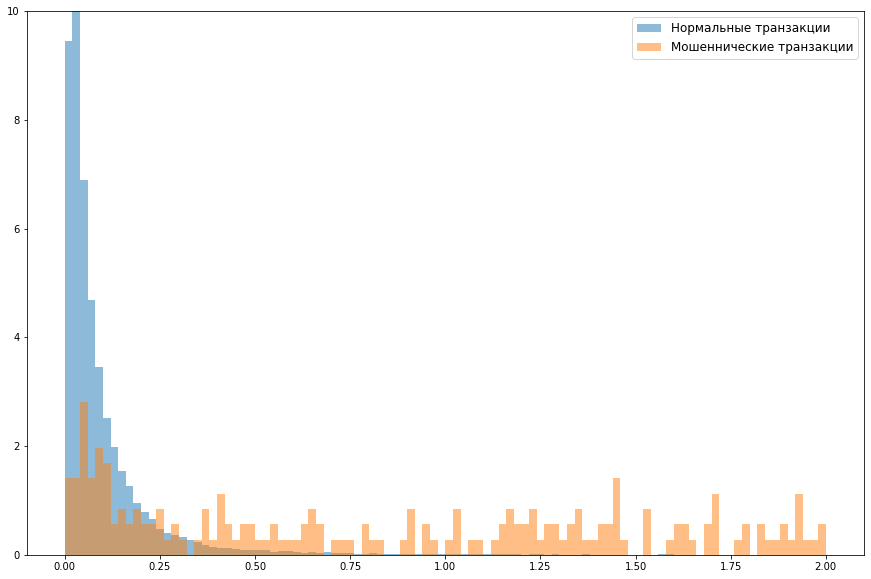

In [ ]:
#Выведем гистаграммы
plt.figure(figsize=(15,10))
plt.hist(error_normal, density=True, bins=100, label='Нормальные транзакции',range=(0,2), alpha = 0.5)  
plt.hist(error_outliers, density=True, bins=100, label='Мошеннические транзакции', range=(0,2), alpha = 0.5) 
plt.ylim(top=10) 
plt.legend(fontsize='large')

Гистограмма ошибок мошеннических операций получается очень размазаная по оси x, поэтому сложно определить пороги для 1 и 3 пунктов. Их надежней брать по посчитанным ранее минимальным и максимальным значениям ошибок.    
1) Порог при котором все мошеннические транзакции будут пойманы: берем значение порога меньше, чем минимальное значение ошибки мошеннических транзакций равное 0.0082   
2) “Оптимальный порог”: какого-то явного пересечения у графиков не наблюдается, визуально хочется взять 0.35   
3) Порог при котором ни одна нормальная транзакция не будет распознана, как мошенническая: берем значение порога больше, чем макимальное значение ошибки нормальных транзакций равное 28.8783


Проверим насколько правильно мы приняли пороги

In [ ]:
#Немного изменим функцию, чтобы она возвращала значения с десятыми долями
def get_accuracy1(bias):
  is_normal = error_normal < bias
  is_outliers = error_outliers > bias 

  proc_normal = sum(is_normal) / len(is_normal) 
  proc_outliers = sum(is_outliers) / len(is_outliers) 

  norm = round(100*proc_normal,4)
  out = round(100*proc_outliers,4)
  mean = round(50*(proc_normal + proc_outliers),4)
      
  return norm, out, mean

In [ ]:
norm1, out1, mean1 = get_accuracy1(0.0081)
print("Распознано нормальных транзакций: ", norm1, "%", sep="")
print("Распознано мошеннических транзакций: ", out1, "%", sep="")
print("Средняя точность распознавания: ", mean1, "%", sep="")

Распознано нормальных транзакций: 1.625%
Распознано мошеннических транзакций: 100.0%
Средняя точность распознавания: 50.8125%


In [ ]:
norm1, out1, mean1 = get_accuracy1(0.35)
print("Распознано нормальных транзакций: ", norm1, "%", sep="")
print("Распознано мошеннических транзакций: ", out1, "%", sep="")
print("Средняя точность распознавания: ", mean1, "%", sep="")

Распознано нормальных транзакций: 95.5648%
Распознано мошеннических транзакций: 88.0081%
Средняя точность распознавания: 91.7865%


In [ ]:
norm1, out1, mean1 = get_accuracy1(28.8783)
print("Распознано нормальных транзакций: ", norm1, "%", sep="")
print("Распознано мошеннических транзакций: ", out1, "%", sep="")
print("Средняя точность распознавания: ", mean1, "%", sep="")

Распознано нормальных транзакций: 100.0%
Распознано мошеннических транзакций: 11.9919%
Средняя точность распознавания: 55.9959%


Видно, что пороги определены правильно